In [1]:
!pip install mlxtend

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import NMF

df = pd.read_csv('Customer Preference Survey (Responses) - Form Responses 1.csv')

In [4]:
df.head(5)

,Timestamp,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,PS5,ทรายแมว,ลำโพง pixel,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
0,10/17/2021 17:29:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10/17/2021 17:43:38,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
2,10/17/2021 17:43:41,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,เคย,ไม่เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
3,10/17/2021 17:43:46,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,เคย,ไม่เคย,เคย,เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ
4,10/17/2021 17:43:49,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคย,เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ


In [5]:
missing = df.isnull().sum()
print(missing)

Timestamp                        0
playstation5                     1
เครื่องทำขนมปัง                  1
Ergonomic Wrist Rest             1
เครื่องอบผ้า                     1
เครื่องชงกาแฟแคปซูล              1
เก้าอี้ LA-Z-Boy                 1
เครื่องให้อาหารสัตว์อัตโนมัติ    1
บัตตาเลี่ยน                      2
แก้วเก็บความเย็น                 1
ลู่วิ่งออกกำลังกาย               1
Kindle                           1
เครื่องซักผ้า                    1
Bluetooth Speaker                1
ห้องน้ำแมวอัตโนมัติ              1
PS5                              1
ทรายแมว                          1
ลำโพง pixel                      1
Logitech Mx Master 3 Mouse       1
ตุ๊กตา ty                        1
น้ำพุแมว                         1
Robot ดูดฝุ่น                    1
Mechanical keyboard              2
Nintendo switch                  2
หนังสือ python                   1
gaming chair                     2
Deskmat                          1
Dew - ไฟโรเซ่                    1
เทียนหอม jo malone  

In [6]:
df.columns.values

array(['Timestamp', 'playstation5', 'เครื่องทำขนมปัง',
       'Ergonomic Wrist Rest', 'เครื่องอบผ้า', 'เครื่องชงกาแฟแคปซูล',
       'เก้าอี้ LA-Z-Boy', 'เครื่องให้อาหารสัตว์อัตโนมัติ', 'บัตตาเลี่ยน',
       'แก้วเก็บความเย็น', 'ลู่วิ่งออกกำลังกาย', 'Kindle',
       'เครื่องซักผ้า', 'Bluetooth Speaker', 'ห้องน้ำแมวอัตโนมัติ', 'PS5',
       'ทรายแมว', 'ลำโพง pixel', 'Logitech Mx Master 3 Mouse',
       'ตุ๊กตา ty', 'น้ำพุแมว', 'Robot ดูดฝุ่น', 'Mechanical keyboard',
       'Nintendo switch', 'หนังสือ python', 'gaming chair', 'Deskmat',
       'Dew - ไฟโรเซ่', 'เทียนหอม jo malone', 'กระติกน้ำ 2 ลิตร',
       'ที่นอน memory form', 'พลาสเตอร์บรรเทาปวด ตราเสือ',
       'การ์ดจอ RTX 3080', 'ขนมจีนน้ำยาปู', 'Salmon Sashimi',
       'จักรยานเสือหมอบ', 'ไฟแต่งห้องมินิมอล', 'External Harddisk',
       'หม้อทอดไร้น้ํามัน', 'airpods ', 'ยาดม', 'ไฟส่องหน้าไลฟ์สด'],
      dtype=object)

In [7]:
df.shape

(47, 42)

In [8]:
df = df.dropna()# ลบ missing 

In [9]:
df.shape 

(40, 42)

In [10]:
df = df.replace(['ไม่เคยซื้อ','ไม่เคยซือ','ไม่เคย','ไม่'],0)
df = df.replace(['เคยซื้อ','เคย'],1)
df.head()

,Timestamp,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,PS5,ทรายแมว,ลำโพง pixel,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
1,10/17/2021 17:43:38,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
2,10/17/2021 17:43:41,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0
3,10/17/2021 17:43:46,0,0,0,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,1,1,0,1,1,0,1,1,1,1,1,1
4,10/17/2021 17:43:49,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
5,10/17/2021 17:43:55,0,0,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,1,1,0,1,1,0,1,0


In [11]:
df.dtypes

Timestamp                        object
playstation5                      int64
เครื่องทำขนมปัง                   int64
Ergonomic Wrist Rest              int64
เครื่องอบผ้า                      int64
เครื่องชงกาแฟแคปซูล               int64
เก้าอี้ LA-Z-Boy                  int64
เครื่องให้อาหารสัตว์อัตโนมัติ     int64
บัตตาเลี่ยน                       int64
แก้วเก็บความเย็น                  int64
ลู่วิ่งออกกำลังกาย                int64
Kindle                            int64
เครื่องซักผ้า                     int64
Bluetooth Speaker                 int64
ห้องน้ำแมวอัตโนมัติ               int64
PS5                               int64
ทรายแมว                           int64
ลำโพง pixel                       int64
Logitech Mx Master 3 Mouse        int64
ตุ๊กตา ty                         int64
น้ำพุแมว                          int64
Robot ดูดฝุ่น                     int64
Mechanical keyboard               int64
Nintendo switch                   int64
หนังสือ python                    int64


In [ ]:
for i in df.columns[1:]:
    print(i, df[i].unique())

playstation5 [0 1]
เครื่องทำขนมปัง [0 1]
Ergonomic Wrist Rest [0 1]
เครื่องอบผ้า [0 1]
เครื่องชงกาแฟแคปซูล [0 1]
เก้าอี้ LA-Z-Boy [0 1]
เครื่องให้อาหารสัตว์อัตโนมัติ [0 1]
บัตตาเลี่ยน [1 0]
แก้วเก็บความเย็น [1 0]
ลู่วิ่งออกกำลังกาย [0 1]
Kindle [0 1]
เครื่องซักผ้า [0 1]
Bluetooth Speaker [0 1]
ห้องน้ำแมวอัตโนมัติ [0 1]
PS5 [0 1]
ทรายแมว [0 1]
ลำโพง pixel [0 1]
Logitech Mx Master 3 Mouse [0 1]
ตุ๊กตา ty [0 1]
น้ำพุแมว [0 1]
Robot ดูดฝุ่น [1 0]
Mechanical keyboard [1 0]
Nintendo switch [0 1]
หนังสือ python [0 1]
gaming chair [0 1]
Deskmat [1 0]
Dew - ไฟโรเซ่ [0 1]
เทียนหอม jo malone [0 1]
กระติกน้ำ 2 ลิตร [0 1]
ที่นอน memory form [0 1]
พลาสเตอร์บรรเทาปวด ตราเสือ [0 1]
การ์ดจอ RTX 3080 [1 0]
ขนมจีนน้ำยาปู [0 1]
Salmon Sashimi [0 1]
จักรยานเสือหมอบ [0 1]
ไฟแต่งห้องมินิมอล [0 1]
External Harddisk [1 0]
หม้อทอดไร้น้ํามัน [1 0]
airpods  [0 1]
ยาดม [0 1]
ไฟส่องหน้าไลฟ์สด [0 1]


In [12]:
dict_count = df.iloc[:,1:].sum().to_dict()
dict_count

{'Bluetooth Speaker': 28,
 'Deskmat': 15,
 'Dew - ไฟโรเซ่': 1,
 'Ergonomic Wrist Rest': 1,
 'External Harddisk': 32,
 'Kindle': 7,
 'Logitech Mx Master 3 Mouse': 5,
 'Mechanical keyboard': 21,
 'Nintendo switch': 5,
 'PS5': 1,
 'Robot ดูดฝุ่น': 14,
 'Salmon Sashimi': 33,
 'airpods ': 19,
 'gaming chair': 4,
 'playstation5': 1,
 'กระติกน้ำ 2 ลิตร': 9,
 'การ์ดจอ RTX 3080': 1,
 'ขนมจีนน้ำยาปู': 24,
 'จักรยานเสือหมอบ': 5,
 'ตุ๊กตา ty': 2,
 'ทรายแมว': 5,
 'ที่นอน memory form': 5,
 'น้ำพุแมว': 4,
 'บัตตาเลี่ยน': 12,
 'พลาสเตอร์บรรเทาปวด ตราเสือ': 22,
 'ยาดม': 33,
 'ลำโพง pixel': 1,
 'ลู่วิ่งออกกำลังกาย': 8,
 'หนังสือ python': 22,
 'หม้อทอดไร้น้ํามัน': 24,
 'ห้องน้ำแมวอัตโนมัติ': 1,
 'เก้าอี้ LA-Z-Boy': 2,
 'เครื่องชงกาแฟแคปซูล': 14,
 'เครื่องซักผ้า': 21,
 'เครื่องทำขนมปัง': 3,
 'เครื่องอบผ้า': 5,
 'เครื่องให้อาหารสัตว์อัตโนมัติ': 2,
 'เทียนหอม jo malone': 6,
 'แก้วเก็บความเย็น': 30,
 'ไฟส่องหน้าไลฟ์สด': 4,
 'ไฟแต่งห้องมินิมอล': 10}

In [13]:
sort_orders = sorted(dict_count.items(), key=lambda x: x[1], reverse=True)

df_top = pd.DataFrame(sort_orders, columns=['item','count'])
df_top.head(10)

,item,count
0,Salmon Sashimi,33
1,ยาดม,33
2,External Harddisk,32
3,แก้วเก็บความเย็น,30
4,Bluetooth Speaker,28
5,ขนมจีนน้ำยาปู,24
6,หม้อทอดไร้น้ํามัน,24
7,หนังสือ python,22
8,พลาสเตอร์บรรเทาปวด ตราเสือ,22
9,เครื่องซักผ้า,21


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3618 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3604 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3649 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3585 missing from current font.
  font.set_text(s

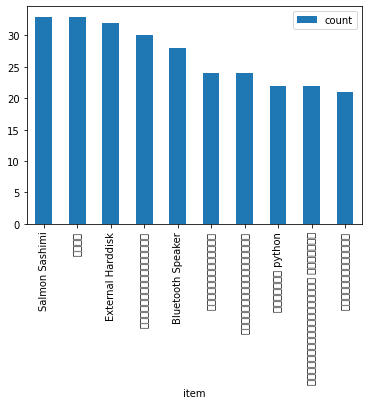

In [14]:
ax = df_top[:10].plot.bar(x='item', y='count')
# ax = sns.barplot(x='item', y='count', data=df_top[:10])

In [15]:
df = df.drop(['Timestamp'], axis=1)

In [17]:
from mlxtend.frequent_patterns import association_rules, apriori

frequent_itemsets = apriori(df, min_support=0.2, max_len = 4, use_colnames=True)
print(frequent_itemsets.shape)
frequent_itemsets.head()

(956, 2)


,support,itemsets
0,0.350,(เครื่องชงกาแฟแคปซูล)
1,0.300,(บัตตาเลี่ยน)
2,0.750,(แก้วเก็บความเย็น)
3,0.200,(ลู่วิ่งออกกำลังกาย)
4,0.525,(เครื่องซักผ้า)


In [19]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print(rules.shape)
rules.sort_values('lift',ascending=False).head(10)

(7990, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5834,"(หม้อทอดไร้น้ํามัน, airpods )","(Bluetooth Speaker, Robot ดูดฝุ่น)",0.300,0.250,0.2,0.666667,2.666667,0.12500,2.250000
4373,"(Bluetooth Speaker, Robot ดูดฝุ่น)","(เครื่องซักผ้า, airpods )",0.250,0.300,0.2,0.800000,2.666667,0.12500,3.500000
5831,"(Bluetooth Speaker, Robot ดูดฝุ่น)","(หม้อทอดไร้น้ํามัน, airpods )",0.250,0.300,0.2,0.800000,2.666667,0.12500,3.500000
4368,"(เครื่องซักผ้า, airpods )","(Bluetooth Speaker, Robot ดูดฝุ่น)",0.300,0.250,0.2,0.666667,2.666667,0.12500,2.250000
2618,"(Salmon Sashimi, เครื่องซักผ้า, แก้วเก็บความเย็น)",(กระติกน้ำ 2 ลิตร),0.350,0.225,0.2,0.571429,2.539683,0.12125,1.808333
2631,(กระติกน้ำ 2 ลิตร),"(Salmon Sashimi, เครื่องซักผ้า, แก้วเก็บความเย็น)",0.225,0.350,0.2,0.888889,2.539683,0.12125,5.850000
3359,(Robot ดูดฝุ่น),"(ขนมจีนน้ำยาปู, แก้วเก็บความเย็น, Mechanical k...",0.350,0.225,0.2,0.571429,2.539683,0.12125,1.808333
3346,"(ขนมจีนน้ำยาปู, แก้วเก็บความเย็น, Mechanical k...",(Robot ดูดฝุ่น),0.225,0.350,0.2,0.888889,2.539683,0.12125,5.850000
5006,"(ขนมจีนน้ำยาปู, หม้อทอดไร้น้ํามัน)","(เครื่องซักผ้า, Mechanical keyboard)",0.300,0.275,0.2,0.666667,2.424242,0.11750,2.175000
5106,"(หม้อทอดไร้น้ํามัน, airpods )","(เครื่องซักผ้า, Mechanical keyboard)",0.300,0.275,0.2,0.666667,2.424242,0.11750,2.175000


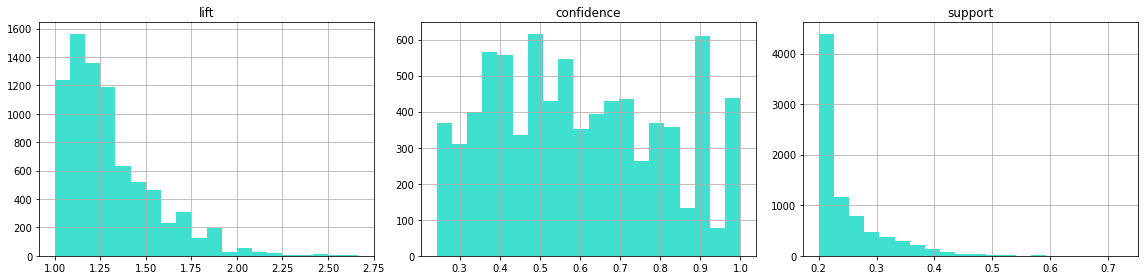

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(16,4), tight_layout=True)
for var, ax in zip(['lift','confidence','support'], axes):
    rules[var].hist(bins=20, ax=ax, color='turquoise')
    ax.set_title(var)
plt.show()

In [23]:
selected_rule = rules[rules['support'] >= 0.26]
print(selected_rule.shape)
selected_rule.head(10)

(2432, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(เครื่องชงกาแฟแคปซูล),(แก้วเก็บความเย็น),0.350,0.750,0.300,0.857143,1.142857,0.03750,1.750000
1,(แก้วเก็บความเย็น),(เครื่องชงกาแฟแคปซูล),0.750,0.350,0.300,0.400000,1.142857,0.03750,1.083333
4,(เครื่องชงกาแฟแคปซูล),(Bluetooth Speaker),0.350,0.700,0.300,0.857143,1.224490,0.05500,2.100000
5,(Bluetooth Speaker),(เครื่องชงกาแฟแคปซูล),0.700,0.350,0.300,0.428571,1.224490,0.05500,1.137500
10,(Salmon Sashimi),(เครื่องชงกาแฟแคปซูล),0.825,0.350,0.300,0.363636,1.038961,0.01125,1.021429
11,(เครื่องชงกาแฟแคปซูล),(Salmon Sashimi),0.350,0.825,0.300,0.857143,1.038961,0.01125,1.225000
14,(เครื่องชงกาแฟแคปซูล),(ยาดม),0.350,0.825,0.350,1.000000,1.212121,0.06125,inf
15,(ยาดม),(เครื่องชงกาแฟแคปซูล),0.825,0.350,0.350,0.424242,1.212121,0.06125,1.128947
20,(Bluetooth Speaker),(บัตตาเลี่ยน),0.700,0.300,0.275,0.392857,1.309524,0.06500,1.152941
21,(บัตตาเลี่ยน),(Bluetooth Speaker),0.300,0.700,0.275,0.916667,1.309524,0.06500,3.600000


In [24]:
perc =[.20, .40, .50, .60, .65, .7, .75, .80, .90]
df_confidence = selected_rule[['confidence']].describe(percentiles=perc).T
perc =[.20, .40, .50, .60, .65, .7, .75, .80, .90]
df_lift = selected_rule[['lift']].describe(percentiles=perc).T

In [25]:
confidence_threshold = df_confidence['80%'].tolist()[0]
lift_threshold = df_lift['80%'].tolist()[0]
print(confidence_threshold)
print(lift_threshold)

0.8235294117647058
1.3250517598343685


In [31]:
# Recommend 1 item based on 2 items
summarize = selected_rule[ (selected_rule['antecedents'].apply(len) == 2) & (rules['consequents'].apply(len) == 1)].sort_values('lift', ascending=False).head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [32]:
#support
summarize.sort_values(by=['support'], ascending=False)[:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1040,"(หม้อทอดไร้น้ํามัน, External Harddisk)",(เครื่องซักผ้า),0.550,0.525,0.425,0.772727,1.471861,0.136250,2.090000
1039,"(เครื่องซักผ้า, External Harddisk)",(หม้อทอดไร้น้ํามัน),0.475,0.600,0.425,0.894737,1.491228,0.140000,3.800000
1064,"(หม้อทอดไร้น้ํามัน, ยาดม)",(เครื่องซักผ้า),0.475,0.525,0.400,0.842105,1.604010,0.150625,3.008333
461,"(เครื่องซักผ้า, แก้วเก็บความเย็น)",(หม้อทอดไร้น้ํามัน),0.450,0.600,0.400,0.888889,1.481481,0.130000,3.600000
1005,"(Salmon Sashimi, หม้อทอดไร้น้ํามัน)",(เครื่องซักผ้า),0.475,0.525,0.375,0.789474,1.503759,0.125625,2.256250
794,"(Bluetooth Speaker, หม้อทอดไร้น้ํามัน)",(เครื่องซักผ้า),0.450,0.525,0.375,0.833333,1.587302,0.138750,2.850000
1004,"(Salmon Sashimi, เครื่องซักผ้า)",(หม้อทอดไร้น้ํามัน),0.425,0.600,0.375,0.882353,1.470588,0.120000,3.400000
945,"(พลาสเตอร์บรรเทาปวด ตราเสือ, หม้อทอดไร้น้ํามัน)",(เครื่องซักผ้า),0.350,0.525,0.300,0.857143,1.632653,0.116250,3.325000
1398,"(Robot ดูดฝุ่น, External Harddisk)",(หม้อทอดไร้น้ํามัน),0.300,0.600,0.275,0.916667,1.527778,0.095000,4.800000
1057,"(เครื่องซักผ้า, airpods )",(หม้อทอดไร้น้ํามัน),0.300,0.600,0.275,0.916667,1.527778,0.095000,4.800000


In [33]:
#lift
summarize.sort_values(by=['lift'], ascending=False)[:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
530,"(ขนมจีนน้ำยาปู, แก้วเก็บความเย็น)",(Robot ดูดฝุ่น),0.450,0.350,0.275,0.611111,1.746032,0.117500,1.671429
412,"(เครื่องซักผ้า, แก้วเก็บความเย็น)",(Robot ดูดฝุ่น),0.450,0.350,0.275,0.611111,1.746032,0.117500,1.671429
1058,"(หม้อทอดไร้น้ํามัน, airpods )",(เครื่องซักผ้า),0.300,0.525,0.275,0.916667,1.746032,0.117500,5.700000
975,"(ขนมจีนน้ำยาปู, หม้อทอดไร้น้ํามัน)",(เครื่องซักผ้า),0.300,0.525,0.275,0.916667,1.746032,0.117500,5.700000
867,"(เครื่องซักผ้า, Mechanical keyboard)",(หม้อทอดไร้น้ํามัน),0.275,0.600,0.275,1.000000,1.666667,0.110000,inf
945,"(พลาสเตอร์บรรเทาปวด ตราเสือ, หม้อทอดไร้น้ํามัน)",(เครื่องซักผ้า),0.350,0.525,0.300,0.857143,1.632653,0.116250,3.325000
1064,"(หม้อทอดไร้น้ํามัน, ยาดม)",(เครื่องซักผ้า),0.475,0.525,0.400,0.842105,1.604010,0.150625,3.008333
794,"(Bluetooth Speaker, หม้อทอดไร้น้ํามัน)",(เครื่องซักผ้า),0.450,0.525,0.375,0.833333,1.587302,0.138750,2.850000
1398,"(Robot ดูดฝุ่น, External Harddisk)",(หม้อทอดไร้น้ํามัน),0.300,0.600,0.275,0.916667,1.527778,0.095000,4.800000
1057,"(เครื่องซักผ้า, airpods )",(หม้อทอดไร้น้ํามัน),0.300,0.600,0.275,0.916667,1.527778,0.095000,4.800000


In [34]:
#confidence
summarize.sort_values(by=['confidence'], ascending=False)[:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
867,"(เครื่องซักผ้า, Mechanical keyboard)",(หม้อทอดไร้น้ํามัน),0.275,0.600,0.275,1.000000,1.666667,0.110000,inf
1058,"(หม้อทอดไร้น้ํามัน, airpods )",(เครื่องซักผ้า),0.300,0.525,0.275,0.916667,1.746032,0.117500,5.700000
975,"(ขนมจีนน้ำยาปู, หม้อทอดไร้น้ํามัน)",(เครื่องซักผ้า),0.300,0.525,0.275,0.916667,1.746032,0.117500,5.700000
1398,"(Robot ดูดฝุ่น, External Harddisk)",(หม้อทอดไร้น้ํามัน),0.300,0.600,0.275,0.916667,1.527778,0.095000,4.800000
1057,"(เครื่องซักผ้า, airpods )",(หม้อทอดไร้น้ํามัน),0.300,0.600,0.275,0.916667,1.527778,0.095000,4.800000
1039,"(เครื่องซักผ้า, External Harddisk)",(หม้อทอดไร้น้ํามัน),0.475,0.600,0.425,0.894737,1.491228,0.140000,3.800000
461,"(เครื่องซักผ้า, แก้วเก็บความเย็น)",(หม้อทอดไร้น้ํามัน),0.450,0.600,0.400,0.888889,1.481481,0.130000,3.600000
1004,"(Salmon Sashimi, เครื่องซักผ้า)",(หม้อทอดไร้น้ํามัน),0.425,0.600,0.375,0.882353,1.470588,0.120000,3.400000
945,"(พลาสเตอร์บรรเทาปวด ตราเสือ, หม้อทอดไร้น้ํามัน)",(เครื่องซักผ้า),0.350,0.525,0.300,0.857143,1.632653,0.116250,3.325000
1064,"(หม้อทอดไร้น้ํามัน, ยาดม)",(เครื่องซักผ้า),0.475,0.525,0.400,0.842105,1.604010,0.150625,3.008333


#Product Recommendation 
### Recommend 1 item based on 2 items

* support score- item ที่มักซื้อคู่กัน ได้แก่ (หม้อทอดไร้น้ํามัน, External Harddisk >> เครื่องซักผ้า)  ค่า support เท่ากับ 0.425
รองลงมาคือ (หม้อทอดไร้น้ํามัน, ยาดม >> เครื่องซักผ้า) และ (เครื่องซักผ้า, แก้วเก็บความเย็น >> หม้อทอดไร้น้ํามัน) ค่า support score เท่ากับ 0.4 


*  life score - item ที่มักซื้อคู่กัน ได้แก่ (ขนมจีนน้ำยาปู, แก้วเก็บความเย็น >> Robot ดูดฝุ่น), (เครื่องซักผ้า, แก้วเก็บความเย็น >> Robot ดูดฝุ่น), (หม้อทอดไร้น้ํามัน, airpods >> เครื่องซักผ้า) และ (ขนมจีนน้ำยาปู, หม้อทอดไร้น้ํามัน >> เครื่องซักผ้า)	ค่า life score เท่ากับ 1.746032 

* confidence score - item ที่มักซื้อคู่กัน ได้แก่ (เครื่องซักผ้า, Mechanical keyboard >> หม้อทอดไร้น้ํามัน) ค่า confidence score เท่ากับ 1 รองลงมาคือ 
(หม้อทอดไร้น้ํามัน, airpods >> เครื่องซักผ้า),(ขนมจีนน้ำยาปู, หม้อทอดไร้น้ํามัน >> เครื่องซักผ้า),(Robot ดูดฝุ่น, External Harddisk >> หม้อทอดไร้น้ํามัน) และ 	(เครื่องซักผ้า, airpods >> หม้อทอดไร้น้ํามัน)	


สรุปแล้วว่าสินค้าที่ซื้อคู่กันส่วนใหญ่จะเป็นพวกเครื่องใช้ไฟฟ้า เครื่องซักผ้า,หม้อทอดไร้น้้ำมัน, Robot ดูดฝุ่น และก้จะมีพวกของใช้ในบ้านและอาหารที่จะซื้อคู่กันอีกด้วย อาจจะเป็นช่วงที่คนกำลัง Work from home เลยอาจจะซื้อของเครื่องใช้ภายในบ้านเพราะออกไปไหนไม่ได้